<a href="https://colab.research.google.com/github/fedhere/MLTSA_FBianco/blob/master/CodeExamples/Age_coronavirus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**a quick, possibly (certainly) buggy analysis of the cornavirus data on Kaggle https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset**

Visualizing the number of deaths, and the presence of the virus by country

TODO: 
* export the bokeh interactive plot to the web
* normalize by population
* review and kill bugs
* review and simplify syntax
* review and comment for posterity

In [3]:
!pip install kaggle

In [39]:
import pandas as pd
import pylab as pl
import json
import os
%pylab inline

pl.style.use("bmh")

Populating the interactive namespace from numpy and matplotlib


In [6]:
from google.colab import drive

drive.mount("/content/gdrive")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
cd gdrive/My\ Drive/


/content/gdrive/My Drive


In [8]:
!ls kaggle.json

kaggle.json


In [0]:
!chmod 600 kaggle.json


In [0]:

envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [11]:
!kaggle datasets list -s coronavirus


ref                                                             title                                                size  lastUpdated          downloadCount  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
kimjihoo/coronavirusdataset                                     Coronavirus-Dataset                                  32KB  2020-03-13 13:48:11          15045  
jamzing/sars-coronavirus-accession                              SARS CORONAVIRUS ACCESSION                            2MB  2020-02-18 15:49:34           2223  
brendaso/2019-coronavirus-dataset-01212020-01262020             2019 Coronavirus dataset (January - February 2020)   53KB  2020-02-06 18:09:28           8554  
paultimothymooney/coronavirus-genome-sequence                   Coronavirus Genome Sequence                           9MB  2020-02-29 00:25:13            264  
gpreda/coronavirus-2019ncov             

In [12]:
!mkdir cv19

mkdir: cannot create directory ‘cv19’: File exists


In [13]:
cd cv19/


/content/gdrive/My Drive/cv19


In [14]:
mkdir data


mkdir: cannot create directory ‘data’: File exists


In [15]:
cd data

/content/gdrive/My Drive/cv19/data


In [16]:
!kaggle datasets download kimjihoo/coronavirusdataset  

100% 32.2k/32.2k [00:00<00:00, 46.8kB/s]



In [17]:
ls

coronavirusdataset.zip  group.csv  patient.csv  route.csv  time.csv  trend.csv


In [18]:
!unzip coronavirusdataset.zip

Archive:  coronavirusdataset.zip
  inflating: case.csv                
replace patient.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: patient.csv             
replace route.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: route.csv               
  inflating: time.csv                
  inflating: trend.csv               


In [19]:
cd ../


/content/gdrive/My Drive/cv19


In [20]:
!ls

2019_nCoV_data.csv	 time_series_19-covid-Confirmed.xlsx
covid19-coronavirus.zip  time_series_19-covid-Deaths.xlsx
data			 time_series_19-covid-Recovered.xlsx
download


In [0]:
patients = pd.read_csv("data/patient.csv")

In [22]:
patients.describe()

,patient_id,birth_year,disease,infection_order,infected_by,contact_number
count,7869.000000,666.000000,28.0,36.000000,70.000000,53.000000
mean,3935.000000,1974.271772,1.0,4.277778,379.000000,67.849057
std,2271.728967,17.423250,0.0,12.032364,540.247528,177.723575
min,1.000000,1929.000000,1.0,1.000000,3.000000,0.000000
25%,1968.000000,1962.000000,1.0,1.000000,29.250000,3.000000
50%,3935.000000,1974.000000,1.0,2.000000,126.000000,17.000000
75%,5902.000000,1990.000000,1.0,3.000000,563.250000,45.000000
max,7869.000000,2018.000000,1.0,74.000000,2621.000000,1160.000000


In [23]:
patients.head()

,patient_id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


In [24]:
patients.tail()

,patient_id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
7864,7865,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaN,NaN,isolated
7865,7866,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaN,NaN,isolated
7866,7867,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaN,NaN,isolated
7867,7868,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaN,NaN,isolated
7868,7869,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaN,NaN,isolated


Pandas datetime variables
https://pandas.pydata.org/pandas-docs/stable/user_guide/timedeltas.html

In [0]:
deadpatients = patients.dropna(subset=["deceased_date"])

In [33]:
deadpatients["born"] = pd.to_datetime(deadpatients["birth_year"].astype(int), format="%Y").dt.year
deadpatients["born"] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


37      1963
53      1963
54      1961
103     1957
106     1953
113     1946
204     1965
285     1958
297     1962
390     1937
442     1979
619     1949
874     1984
900     1934
924     1951
1063    1943
1287    1955
1442    1945
1920    1953
2084    1949
2288    1954
2578    1940
2613    1943
2768    1934
2935    1939
3549    1951
3577    1930
3895    1933
3913    1938
4045    1962
5142    1960
5459    1940
5766    1938
5767    1935
6284    1929
7195    1945
Name: born, dtype: int64

In [34]:
deadpatients["dead"] = pd.to_datetime(deadpatients["deceased_date"]).dt.year
deadpatients["dead"] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


37      2020
53      2020
54      2020
103     2020
106     2020
113     2020
204     2020
285     2020
297     2020
390     2020
442     2020
619     2020
874     2020
900     2020
924     2020
1063    2020
1287    2020
1442    2020
1920    2020
2084    2020
2288    2020
2578    2020
2613    2020
2768    2020
2935    2020
3549    2020
3577    2020
3895    2020
3913    2020
4045    2020
5142    2020
5459    2020
5766    2020
5767    2020
6284    2020
7195    2020
Name: dead, dtype: int64

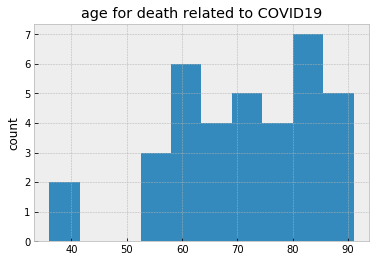

In [44]:
pl.hist(pd.to_timedelta(deadpatients["dead"]  - deadpatients["born"]).astype(int)); 
pl.ylabel("age at death")
pl.ylabel("count")
pl.title("age for death related to COVID19");